# Compare two simulation results

In [86]:
import init as init
import numpy as np
import matplotlib.pyplot as plt

codefolder = "../../../SoHAPPy/" 
import sys
sys.path.append(codefolder) 

from utilities import MyLabel
from utilities import stamp

plt.style.use('seaborn-talk') # Make the labels readable
#plt.style.use('seaborn-poster') # Make the labels readable - bug with normal x marker !!!
col_n = "tab:blue"
col_s = "tab:red"
col_b = "tab:purple"

In [87]:
folder1 = "../../../output/new17-107-24deg-newirf/"
folder2 = "../../../output/new17-107-24deg-newirf-100iter/"
tag1 = "No fluctuate"
tag2 = "100 iter."

In [88]:
file1 = init.create_csv(folder1,debug=True)
file2 = init.create_csv(folder2,debug=True)
(grb1, gn01, gs01, gn1, gs1, gb1) = init.get_data(file1, debug=True)
(grb2, gn02, gs02, gn2, gs2, gb2) = init.get_data(file2, debug=True)

 >>>  ../../../output/new17-107-24deg-newirf/data.csv
../../../output/new17-107-24deg-newirf/data.csv  exists
 >>>  ../../../output/new17-107-24deg-newirf-100iter/data.csv
../../../output/new17-107-24deg-newirf-100iter/data.csv  exists
 DATA READING from  ../../../output/new17-107-24deg-newirf/data.csv
Supplementary information is present
 grb.N==1 seen North only
 gbr.S==1 seen South only
 grb.B==1 seen on both

+-------------------------- Flags ---------------------------+
 Flags:
   No visible flag, unvis           =  -999
   Iteration # from error code, 3s and 5s counts :  1 1 1
+----------------------- Statistics -------------------------+
   Not visible   Fully analyzed      Aborted    
      1374            1626              0       

 Raw statistics - max per site = 2000
  - total      :  3000
  - analyzable :  1626
  - North      :  599
  - South      :  613
  - Both sites :  414 -> total =  1626
  - North only :  187
  - South only :  201
+------------------------------------

In [93]:
print(">>>>> ",tag1)
init.rate(grb1,nyears=44)
print(">>>>> ",tag2)
init.rate(grb2,nyears=44)

>>>>>  No fluctuate

 -------------------------------------------------------
 Normalized to 44 years
 -------------------------------------------------------
 Rate :       N       S   Nonly   Sonly    Both   Total
 ------ ------- ------- ------- ------- ------- -------
 Vis. :    13.6    13.9     4.2     4.6     9.4    18.3
 Ana. :    13.6    13.9     4.2     4.6     9.4    18.3
 3s   :     2.7     2.5     0.8     0.6     2.8     4.2
 5s   :     2.3     2.0     0.7     0.5     2.3     3.5
 -------------------------------------------------------
>>>>>  100 iter.

 -------------------------------------------------------
 Normalized to 44 years
 -------------------------------------------------------
 Rate :       N       S   Nonly   Sonly    Both   Total
 ------ ------- ------- ------- ------- ------- -------
 Vis. :    13.6    13.9     4.2     4.6     9.4    18.3
 Ana. :     6.8     6.4     2.1     1.9     6.8    10.9
 3s   :     2.4     2.3     0.7     0.5     2.6     3.8
 5s   :     

In [126]:
def flag_stat(pop,tag):
    flags = set(pop.err)
    print(" Error flags in '",tag,"':", flags)
    for f in flags:
        print("   {:5d}: {:5d} <sig> {:8.2f}  <sig >=3> {:8.2f}"
              .format(f,
                      len(pop[pop.err==f]),
                      np.mean(pop.sigmx[pop.err==f]),
                      np.mean(pop.sigmx[(pop.err==f) & (pop.sigmx>=3)]) ))
    print()
    return
flag_stat(grb1,tag1)
flag_stat(grb2,tag2)


 Error flags in ' No fluctuate ': {1, -999}
       1:  1626 <sig>    14.23  <sig >=3>    64.43
    -999:  1374 <sig>    -1.00  <sig >=3>      nan

 Error flags in ' 100 iter. ': {-999, 10, 100}
    -999:  1374 <sig>    -1.00  <sig >=3>      nan
      10:   742 <sig>    -1.00  <sig >=3>      nan
     100:   884 <sig>    27.12  <sig >=3>    51.50

 The acceleartion bias the sigm values as it removes most events with sigma<= 3)


In [96]:
###-------------------------------------------------------------------------------------------------
def var_plot(var1, var2, tag=["o","o"],varmin=0, varmax= 10000, nbin=100,xscale="log",yscale="log"):
    mask1 = (var1<=varmax) & (var1>varmin)
    mask2 = (var2<=varmax) & (var2>varmin)
    
    fig, (axa, axb) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
    n, bins, p = axa.hist(var1[mask1],bins=nbin,alpha=0.5,
                          label=MyLabel(var1[mask1],tag[0]))

    axa.hist(var2[mask2],bins=bins,alpha=0.5,
             label=MyLabel(var2[mask2],tag[1]))
    
    axa.set_xscale(xscale)
    axa.set_yscale(yscale)
    axa.legend()
    
    axb.hist(var2[mask2]/var1[mask1],bins=nbin,alpha=0.5,
                          label=MyLabel(var2[mask2]/var1[mask1],tag[1]+"/"+tag[0]))
    axb.legend()
    return
    


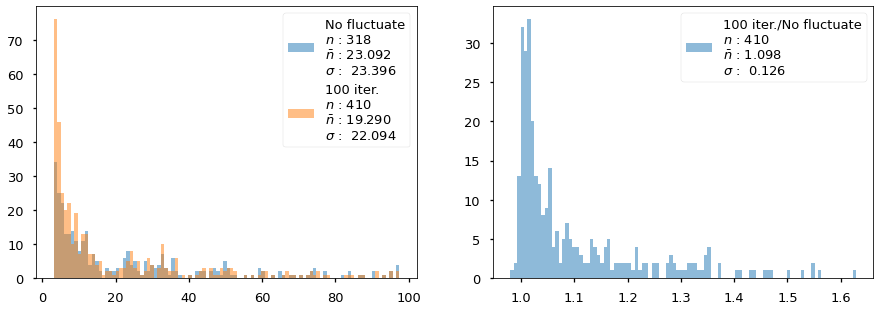

In [97]:
var_plot(grb1[nmin:nmax].sigmx, grb2[nmin:nmax].sigmx,tag=[tag1,tag2],varmin=3,varmax=100,xscale="linear",yscale="linear")

In [ ]:
###-------------------------------------------------------------------------------------------------    
def var_scatter(var1, var2, tag=["o","o"],varmin=5, varmax= 10000, nbin=100,xscale="log",yscale="log"):

    mask1 = (var1<=varmax) & (var1>varmin)
    mask2 = (var2<=varmax) & (var2>varmin)
    fig, (axa,axb, axc) = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

    axa.scatter(var1,var2,marker="+")
    axa.plot([-1,3],[-1,3],ls=":",color="red")
    axa.axvline(3,label="3s",color="tab:orange",ls=":")
    axa.axhline(3,label="3s",color="tab:orange",ls=":")
    axa.axvline(5,label="5s",color="tab:green",ls=":")
    axa.axhline(5,label="5s",color="tab:green",ls=":")
    axa.set_xlabel(tag[0])
    axa.set_ylabel(tag[1])
    axa.set_xlim(varmin,varmax)
    axa.set_ylim(varmin,varmax)
    axa.set_xscale(xscale)
    axa.set_yscale(yscale)
    axa.legend()

    axb.scatter(var2,100*(var2-var1)/var1,marker="+")
    axb.axvline(3,label="3s",color="tab:orange",ls=":")
    axb.axvline(5,label="5s",color="tab:green",ls=":")
    axb.set_xlabel(tag[0])
    axb.set_ylabel("Diff (%)")
    axb.set_title("Excess diff. in '"+tag2+"' compared to '"+tag1+"'")
    axb.set_xscale(xscale)
    axb.set_yscale(yscale)
    axb.set_xlim(varmin,varmax)
    axb.set_ylim(-10,50)
    axb.set_xscale(xscale)
    axb.set_yscale(yscale)
    axb.legend()    
    
    axb.scatter(var2,100*(var2-var1)/var1,marker="+")
    axb.axvline(3,label="3s",color="tab:orange",ls=":")
    axb.axvline(5,label="5s",color="tab:green",ls=":")
    axb.set_xlabel(tag[0])
    axb.set_ylabel("Diff (%)")
    axb.set_title("Excess diff. in '"+tag2+"' compared to '"+tag1+"'")
    axb.set_xscale(xscale)
    axb.set_yscale(yscale)
    axb.set_xlim(varmin,varmax)
    axb.set_ylim(-10,50)
    axb.set_xscale(xscale)
    #axb.set_yscale(yscale)
    axb.legend()    
    
    axc.scatter(var2,var2/var1,marker="+")
    axc.axvline(3,label="3s",color="tab:orange",ls=":")
    axc.axvline(5,label="5s",color="tab:green",ls=":")
    axc.set_xlabel(tag[0])
    axc.set_ylabel("Ratio ")
    axc.set_title(tag2+" / "+tag1+"")
    axc.set_xscale(xscale)
    axc.set_yscale(yscale)
    axc.set_xlim(varmin,varmax)
    axc.set_ylim(-10,50)
    axc.set_xscale(xscale)
    axc.set_yscale(yscale)
    axc.legend()    
        
    return

False

C:\Users\stolar\AppData\Local\Continuum\anaconda3\gpy0.17\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\stolar\AppData\Local\Continuum\anaconda3\gpy0.17\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\stolar\AppData\Local\Continuum\anaconda3\gpy0.17\lib\site-packages\ipykernel_launcher.py:79: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


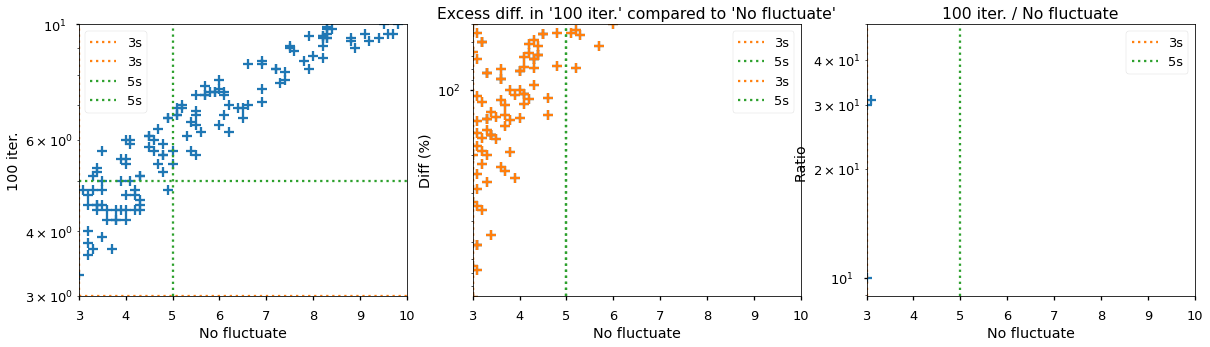

In [85]:
var_scatter(grb1[nmin:nmax].sigmx, grb2[nmin:nmax].sigmx,tag=[tag1,tag2],varmin=3,varmax=10,xscale="linear",yscale="log")

In [ ]:
nbin=100

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
nmin=-10
nmax=1000

def F(ax,var1,var2, vmin=0,vmax=0, tag=""):

    mask1 = (var1 <= vmax) & (var1 > vmin)
    mask2 = (var2 <= vmax) & (var2 > vmin)

    n, bins, p = ax.hist(var1[mask1],bins=nbin,alpha=0.5,
                         label=MyLabel(var1[mask1],"old"))
    ax.hist(var2[mask2],bins=bins,alpha=0.5,
             label=MyLabel(var2[mask2],"new"))
    ax.set_yscale("log")
    ax.set_title(tag)
    ax.legend()
    
    axx = 
    return

F(ax1, g_ana1.nexmx, g_ana2.nexmx,vmin=-10,vmax=1000,tag="Signal")
F(ax2, g_ana1.nbmx,  g_ana2.nbmx, vmin=-10, vmax=10000,tag="Background")